Boston is one of the most divided cities in the United States. While celebrated for its rich colonial history, prestigious education, and booming tech sector, Boston is also plagued with deep-seated racial disparities. Growing up in Charlestown and Dorchester I have witnessed firsthand how infrastructure and opportunity vary from one neighborhood to the next. This project aims to explore and visualize a publicly available dataset related to income and socioeconomic indicators across towns in the Boston area. My goal is to not just analyze, but comprehend the underlying patterns that tell us why Boston looks like the way it does.

Questions: 
Which neighborhoods have the highest and lowest median family incomes? What demographic or structural patterns explain these differences?
What demographic indicators correlate most strongly with median income acros neighborhoods?


First we need to import the necessary libraries:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/fortuneudeh/Desktop/projectTwo/neighborhood-childcare-affordabilty-analysis.csv', index_col='Neighborhoods')
#Making the first column the index for readability

I notice certain column names start with blank space, which will make indexing difficult later, so I will clean up their names. I will also drop any unnamed columns and rows

In [40]:
columns = df.columns.tolist()
for column in columns:
    if column.startswith(' '): 
        df.rename(columns={column: column.strip()}, inplace=True) 

In [34]:
df.drop(columns=['Unnamed: 18'], inplace=True)

Before seeing which neighborhoods have the highest and lowest median income, I must convert the median income column to float values to prepare for analysis

In [72]:
df['MedianIncome'] = df['MedianIncome'].replace('[\$,]', '', regex=True).astype(float)

The commas in the population columns makes pandas interpret them as strings, so I will remove them.

In [52]:
df = df.apply(lambda col: col.str.replace(',', '', regex=False) if col.dtype == "object" else col)

I'll also remove those trailing rows only containing missing values 

In [42]:
df = df.dropna(axis=0, how='any')

The percentages in some columns would prohibit certain forms of wrangling, so I removed them.

In [53]:
df = df.apply(lambda col: col.str.replace('%', '', regex=True).astype(float) if col.dtype == 'object' else col)



Finally, I'll make sure that the entire dataframe is in the float datatype. 

In [54]:
df.dtypes

PopBto5              float64
Pop0to2              float64
Pop3to5              float64
ParentLabFor         float64
WhitePer             float64
BlackPer             float64
LatinxPer            float64
AsianPer             float64
MarFam               float64
MalFam               float64
FemFam               float64
PovPer               float64
MedianIncome         float64
InfCostCareMedInc    float64
PreCostCareMedInc    float64
InfCarAfford         float64
PreCareAfford        float64
dtype: object

I will visualise the distribution of income through a scatterplot. This way, I'll know which neighborhoods have the highest and lowest median incomes.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Roxbury'),
  Text(1, 0, 'East Boston'),
  Text(2, 0, 'Mattapan'),
  Text(3, 0, 'Dorchester'),
  Text(4, 0, 'Fenway/Kenmore'),
  Text(5, 0, 'Hyde Park'),
  Text(6, 0, 'Boston'),
  Text(7, 0, 'Allston/Brighton'),
  Text(8, 0, 'Roslindale'),
  Text(9, 0, 'South Boston'),
  Text(10, 0, 'South End'),
  Text(11, 0, 'Jamaica Plain'),
  Text(12, 0, 'West Roxbury'),
  Text(13, 0, 'Charlestown'),
  Text(14, 0, 'Central Boston'),
  Text(15, 0, 'Back Bay/Beacon Hill')])

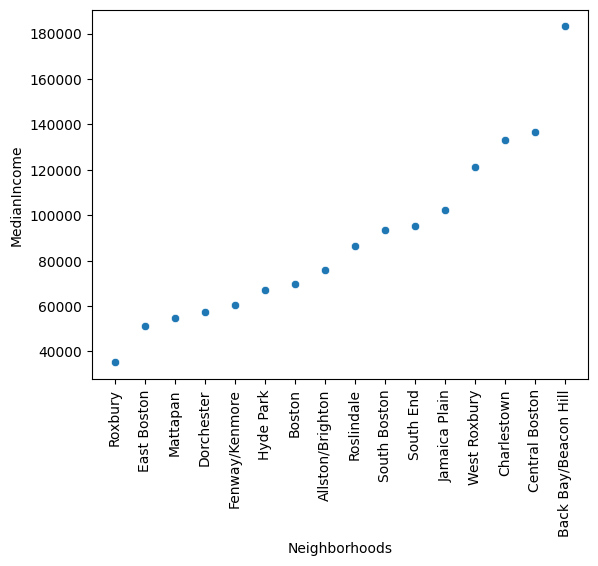

In [55]:
sorted_data = df.sort_values(by='MedianIncome')
sns.scatterplot(x=sorted_data.index, y='MedianIncome', data=sorted_data)
plt.xticks(rotation=90) 

In [56]:
print(df['MedianIncome'].idxmax(), ':', df['MedianIncome'].max())
print(df['MedianIncome'].idxmin(), ':', df['MedianIncome'].min())

Back Bay/Beacon Hill : 183159.0
Roxbury : 35160.0


Next, I am curious about the average income throughout the entire city of Boston so I know what to compare these values to.

In [57]:
df.loc['Boston']['MedianIncome']

np.float64(69616.0)

To nobody's surprise, Back Bay/Beacon Hill boasts the highest median income of 183,159 while Roxbury has the least of just 35,160.

Next, I want to compare the demographics of neighborhoods with a median family
income higher than 70,000 dollars, the average across the city of Boston, compared to neighborhoods with a median family income less than 70,000.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Allston/Brighton'),
  Text(1, 0, 'Roslindale'),
  Text(2, 0, 'South Boston'),
  Text(3, 0, 'South End'),
  Text(4, 0, 'Jamaica Plain'),
  Text(5, 0, 'West Roxbury'),
  Text(6, 0, 'Charlestown'),
  Text(7, 0, 'Central Boston'),
  Text(8, 0, 'Back Bay/Beacon Hill')])

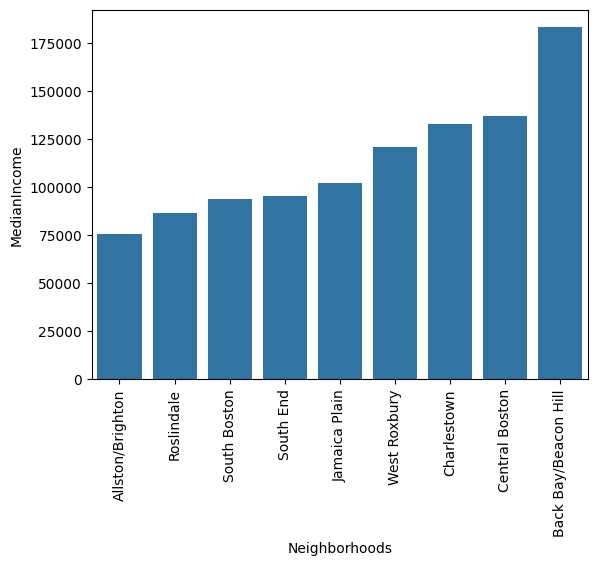

In [58]:
df['BlackPer'] = df['BlackPer'].replace('%', '', regex=True).astype(float)
upperClass = df['MedianIncome'] > 70000 #creates a series of boolean values indicating whether the MedianIncome is greater than 70000
highIncomeNeighborhoods = df[upperClass] #filters the DataFrame to include only neighborhoods with MedianIncome greater than 70000 (creates a new DataFrame)
highIncomeNeighborhoods = highIncomeNeighborhoods.sort_values(by='MedianIncome', ascending=True)
#plotting the high-income neighborhoods
sns.barplot(x=highIncomeNeighborhoods.index, y='MedianIncome', data=highIncomeNeighborhoods)
plt.xticks(rotation=90) 

Text(0.5, 1.0, 'Low Income Neighborhoods')

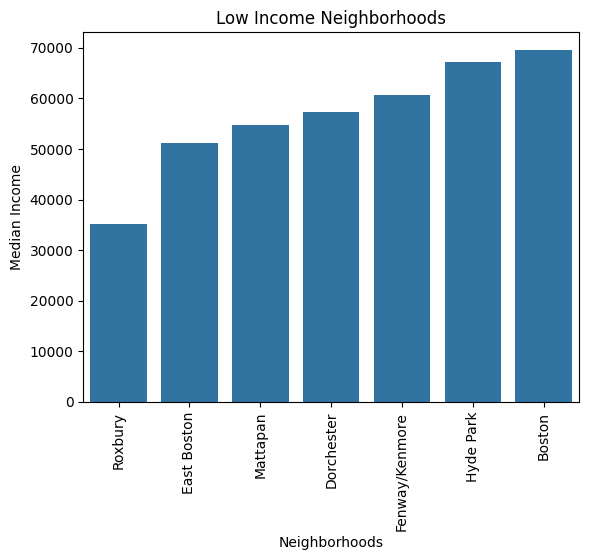

In [59]:
lowerClass = df['MedianIncome'] < 70000 #creates series of boolean values indicating whether the MedianIncome is greater than 100000
lowIncomeNeighborhoods = df[lowerClass]
lowIncomeNeighborhoods = lowIncomeNeighborhoods.sort_values(by='MedianIncome', ascending=True) #this can be a lot simpler
# Plotting the low-income neighborhoods
sns.barplot(x=lowIncomeNeighborhoods.index, y='MedianIncome', data=lowIncomeNeighborhoods)
plt.xticks(rotation=90)
plt.ylabel('Median Income')
plt.title('Low Income Neighborhoods')

Next, I want to visualize the racial makeup of these towns to see if race is a correlating indicator of a neighborhood's median income

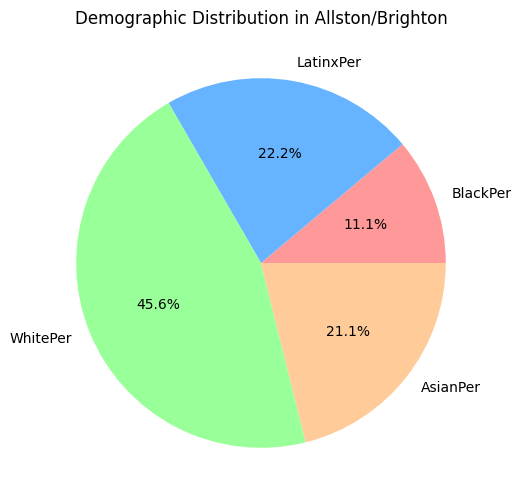

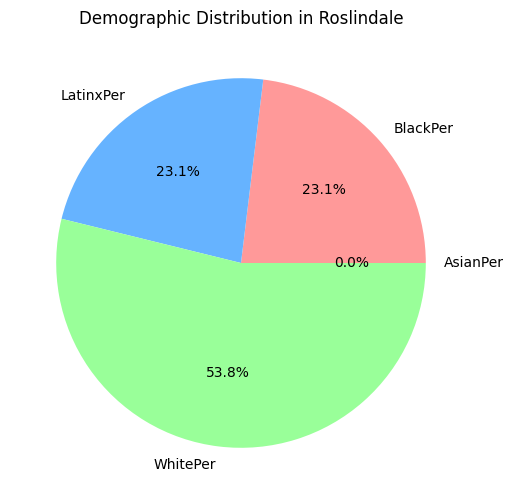

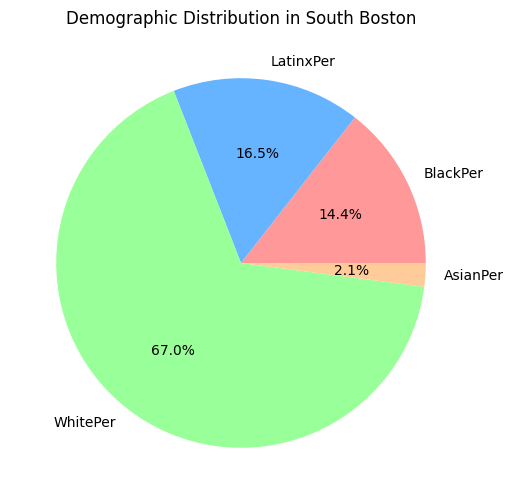

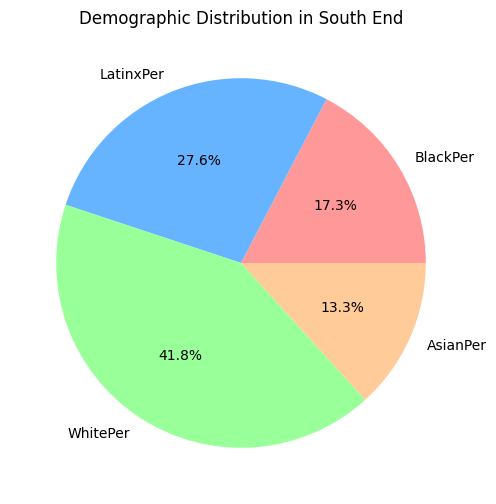

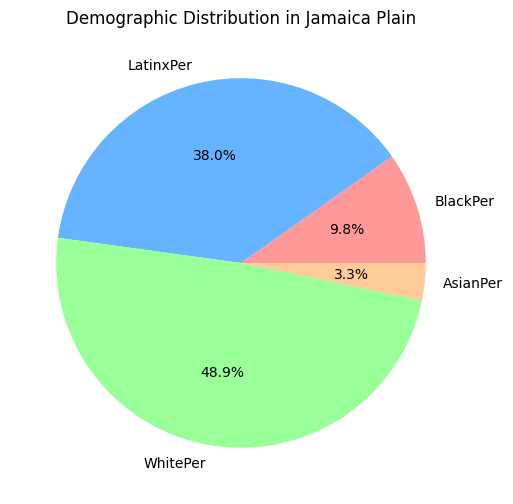

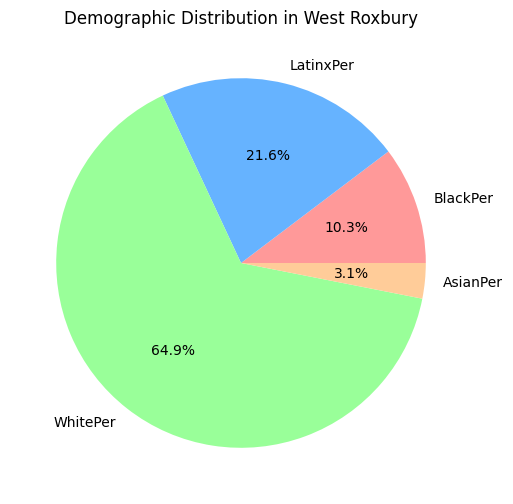

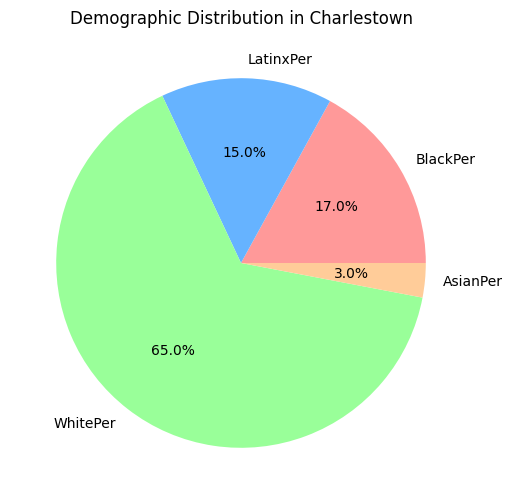

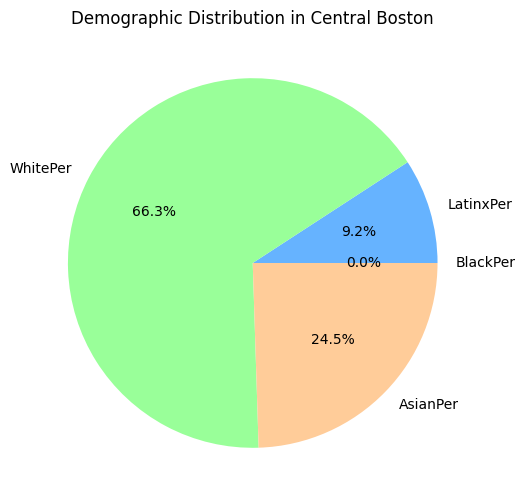

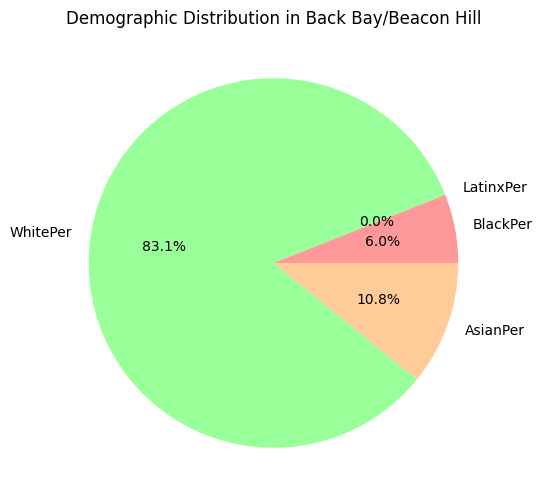

In [90]:
percentages = highIncomeNeighborhoods[['BlackPer', 'LatinxPer', 'WhitePer', 'AsianPer']]
# Convert percentage columns to numeric values 
for neighborhood, data in highIncomeNeighborhoods.iterrows():
    plt.figure(figsize=(8, 6))
    plt.pie(data[percentages.columns], labels=percentages.columns, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    plt.title(f"Demographic Distribution in {neighborhood}")
    plt.show() 

I'm seeing lots of green (white) across these neighborhoods with a median family income above the average across the city of Boston...

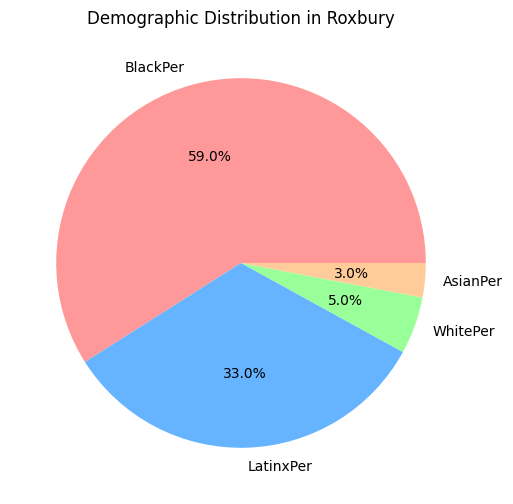

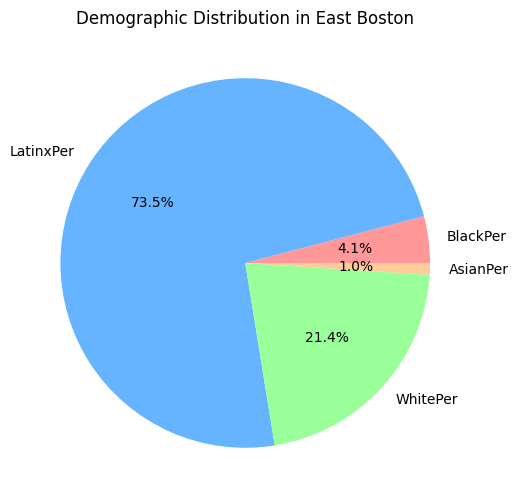

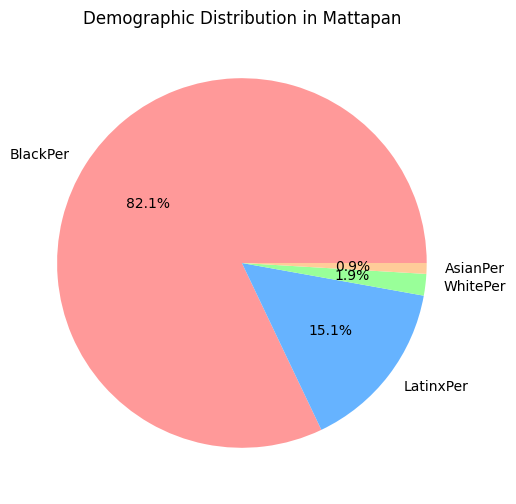

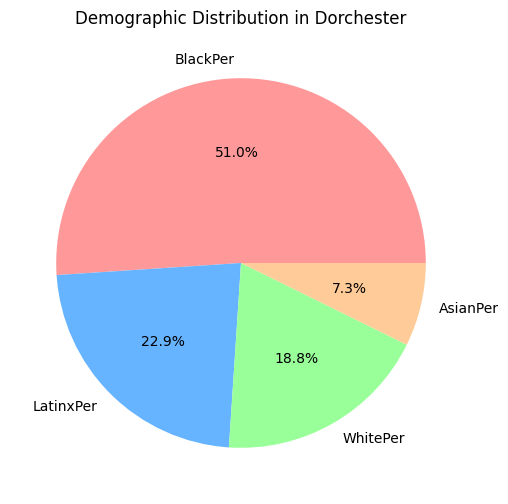

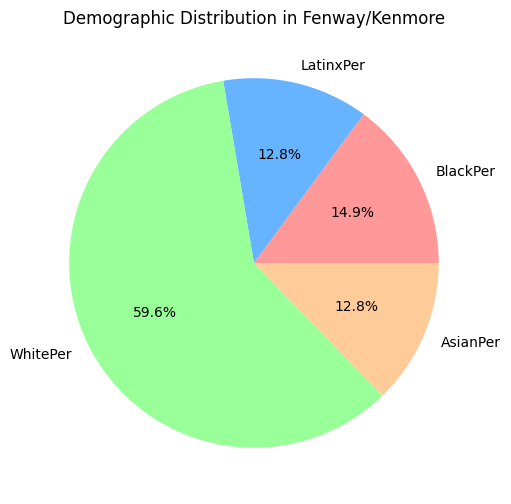

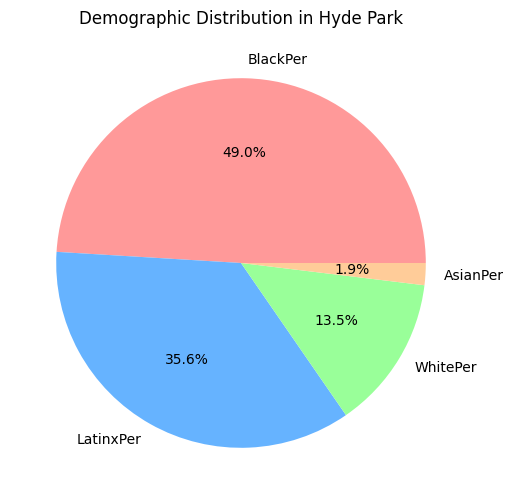

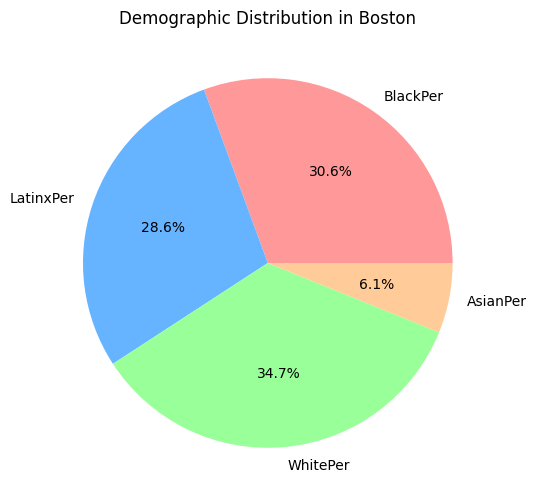

In [60]:
percentages = lowIncomeNeighborhoods[['BlackPer', 'LatinxPer', 'WhitePer', 'AsianPer']]
#convert percentage columns to numeric values 
for neighborhood, data in lowIncomeNeighborhoods.iterrows():
    plt.figure(figsize=(8, 6))
    plt.pie(data[percentages.columns], labels=percentages.columns, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    plt.title(f"Demographic Distribution in {neighborhood}")
    plt.show() 

I am noticing a lot of red and blue, which signify the percentages of Black and Latinx populations respectively. So I compared these populations to the median family income using the correlation constant to see if there was any relationship.

In [61]:
df['Black_Latinx'] = df['BlackPer'] + df['LatinxPer']
correlation_small = df[['Black_Latinx', 'MedianIncome']].corr().iloc[0,1]
print(f"Correlation: {correlation_small}")

Correlation: -0.7887454622100214


The correlation is highly negative, signifying that there is an inverse relationship between black and latinx populations and median income. Lets visualize it with a regression plot,

<Axes: xlabel='Black_Latinx', ylabel='MedianIncome'>

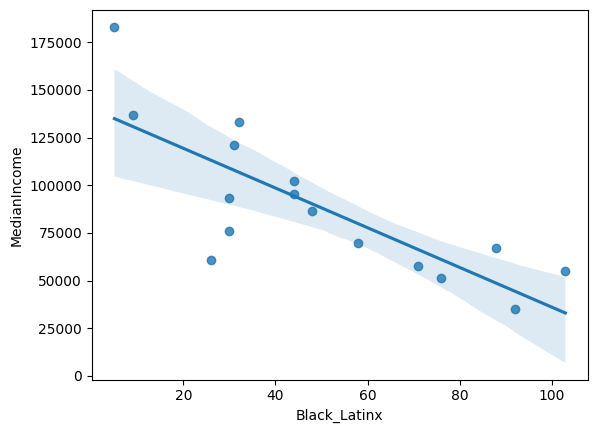

In [62]:
# Plotting the correlation
sns.regplot(x='Black_Latinx', y='MedianIncome', data=df)

I want to look a bit closer, however. Are there any other telling relationshiops I can explore using the correlation constant?

In [63]:
dfGrouped = df[['WhitePer', 'BlackPer', 'LatinxPer', 'AsianPer', 'PovPer', 'MedianIncome']]
correlation = dfGrouped.corr()
comparedToIncome = correlation['MedianIncome']
comparedToIncome

WhitePer        0.796844
BlackPer       -0.586200
LatinxPer      -0.561444
AsianPer        0.282295
PovPer         -0.776633
MedianIncome    1.000000
Name: MedianIncome, dtype: float64

There is a strong positive correlation between the percentage of the white population and median income. Towns with higher white population percentages tend to have higher median incomes. Are any other variables in the dataset similarly correlated with income?

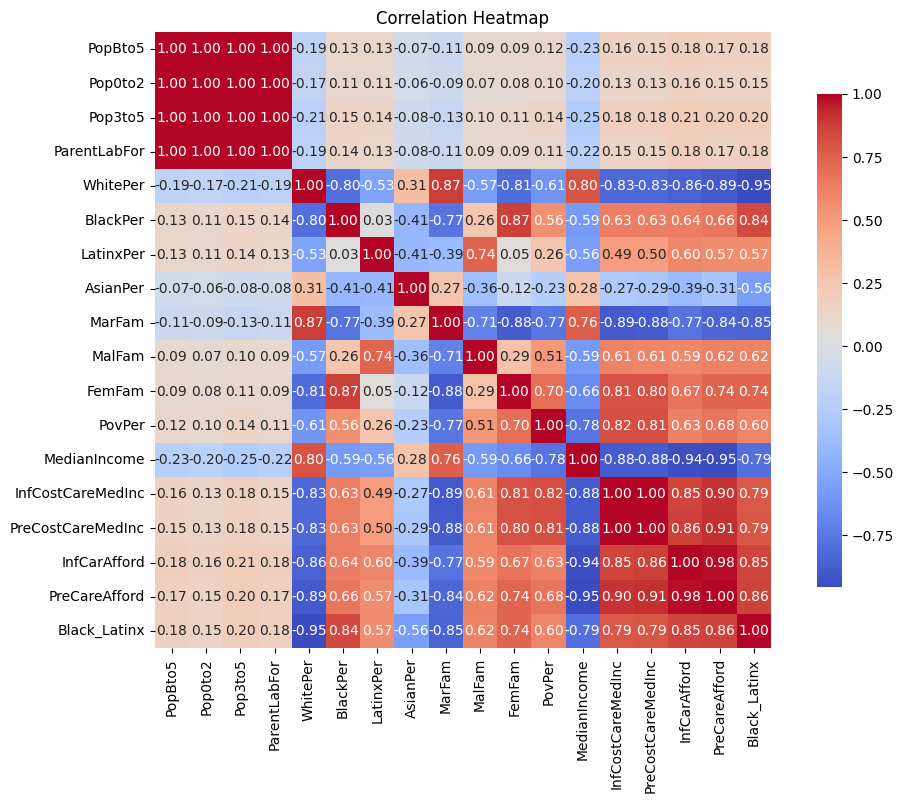

In [74]:
correlation1 = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation1, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

This heatmap feels pretty overwhelming, so I will filter it to only show correlation values with an absolute value greater than 0.6, indicating strong positive or negative relationships.

In [75]:
filtered_correlation = correlation1[(correlation1 > 0.6) | (correlation1 < -0.6)]
comparedToIncome1 = filtered_correlation['MedianIncome']
comparedToIncome1

PopBto5                   NaN
Pop0to2                   NaN
Pop3to5                   NaN
ParentLabFor              NaN
WhitePer             0.796844
BlackPer                  NaN
LatinxPer                 NaN
AsianPer                  NaN
MarFam               0.762879
MalFam                    NaN
FemFam              -0.655994
PovPer              -0.776633
MedianIncome         1.000000
InfCostCareMedInc   -0.880936
PreCostCareMedInc   -0.883850
InfCarAfford        -0.942425
PreCareAfford       -0.953207
Black_Latinx        -0.788745
Name: MedianIncome, dtype: float64

It makes sense that poverty percentage shows a strong negative correlation with median income because higher poverty rates directly indicate lower income levels. Similarly, social welfare indicators such as the share of families unable to afford infant or preschool care also correlate negatively with median income, meaning that families with lower incomes struggle to cover these costs. In a society without arbitrary divisions like race, the question then becomes: what would the median family income be across Boston's neighborhoods if these socioeconomic disparities were eliminated?

First, I must identify which features encode racial bias in order to exclude them.

In [67]:
realX = df.drop(columns=['MedianIncome', 'Black_Latinx'])  # Features excluding the target variable and the combined demographic feature
equity_features = ['PopBto5', 'Pop0to2', 'Pop3to5', 'ParentLabFor']
equityX = df[equity_features]  # Drops columns that I deem to be biased when predicting median income

y = df['MedianIncome']  # Target variable
y.dropna(how='all', inplace=True)  # Ensure the target variable doesnt contain NaN values


Why I excluded each column:


'BlackPer', 'LatinxPer', 'WhitePer', 'AsianPer': These are explicit racial categories that contradict the goal of modeling a world without racial bias

'MarFam': Including this could unintentionally reintroduce bias by associating certain family types with lower income.

'MalFam': Same as last

'FemFam': Same as last

'InfCarAfford': This reflects the outcome of systemic inequities. Those who cannot afford the cost of infant care are likely to be in those marginalized racial groups I previously excluded.
'PreCareAfford': Same as last
'InfCostCareMedInc': Same as last
'PreCostCareMedInc': Same as last
'PovPer': This is represented as an outcome of systems such as redlining, underemployment, etc. 

Next I'll train two models to predict median income: one using all available features, including race and socioeconomic indicators, and another excluding race and related variables. Comparing these models will help assess the potential bias that the racial features contribute, allowing me to explore income predictions in a more equitable context.

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#equity model
Xe_train, Xe_test, ye_train, ye_test = train_test_split(equityX, y, test_size=0.2, random_state=42)

#real world model
Xr_train, Xr_test, yr_train, yr_test = train_test_split(realX, y, test_size=0.2, random_state=42)

#fit the models
real_model = LinearRegression().fit(Xr_train, yr_train)
equity_model = LinearRegression().fit(Xe_train, ye_train)

#Predicting on test sets so R-squared and MSE will not be overfitted
predictedReal = real_model.predict(Xr_test)
predictedEquity = equity_model.predict(Xe_test)

#Predictions for all neighborhoods
predictedRealAll = real_model.predict(realX)
predictedEquityAll = equity_model.predict(equityX)

Next I will graph a barplot of the the two models

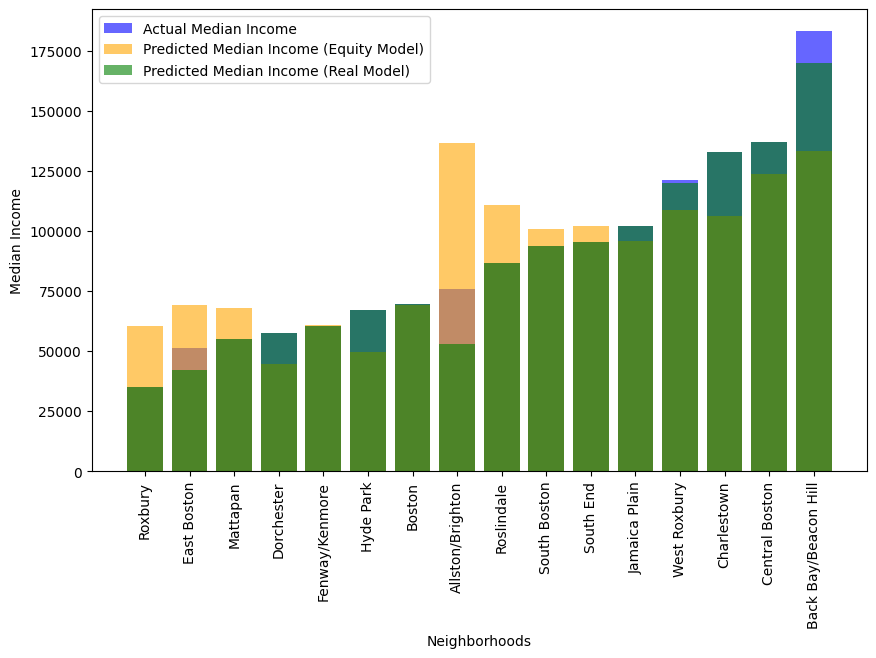

In [88]:
df['MedianEquity'] = predictedEquityAll
df['MedianReal'] = predictedRealAll
# Plotting the predictions
plt.figure(figsize=(10, 6))
sorted_df = df.sort_values(by='MedianIncome')
plt.bar(sorted_df.index, sorted_df['MedianIncome'], label='Actual Median Income', color='blue', alpha=0.6)
plt.bar(sorted_df.index, sorted_df['MedianEquity'], label='Predicted Median Income (Equity Model)', color='orange', alpha=0.6)
plt.bar(sorted_df.index, sorted_df['MedianReal'], label='Predicted Median Income (Real Model)', color='green', alpha=0.6)
plt.xlabel('Neighborhoods')
plt.ylabel('Median Income')
plt.xticks(rotation=90)
plt.legend()

In a more equitable world, Roxbury’s median family income would nearly double, with East Boston and Mattapan also seeing significant increases. These are currently the bottom three neighborhoods by income, meaning they are underestimated under the current socioeconomic structure.

Note: The brown bars are where the actual income (purple) and equity model (yellow) overlap. Their endpoint represents the actual median income.

The dark teal bars reflect overlap between the real-world model (green) and the equity model (yellow). Their endpoint represents the equity model’s prediction.

One anomaly stands out: Allston/Brighton has a major spike in the equity model prediction. This could be due to high values in features like ParentLabFor (parental labor force participation), which correlate with higher white population percentages. Without race to offset it, the equity model could overestimate income based on this alone.

Lastly, I'll calculate the mean squared error and R-squared values to assess the accuracy of these models. The R-squared value tells you how well the model explains the overall trend in the data, while MSE shows how far off the predictions are on average. An R-squared value means the model captures patterns well; a low MSE means it's making accurate predictions.

In [84]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_real = r2_score(yr_test, predictedReal)
print(f'R^2 value for the real model: {r2_real:.2f}')

r2_equity = r2_score(ye_test, predictedEquity)
print(f'R^2 value for the equity model: {r2_equity:.2f}')

mse_real = mean_squared_error(yr_test, predictedReal)
print(f"Mean Squared Error (Real Model): {mse_real:.2f}")

mse_equity = mean_squared_error(ye_test, predictedEquity)
print(f"Mean Squared Error (Equity Model): {mse_equity:.2f}")

R^2 value for the real model: 0.92
R^2 value for the equity model: 0.34
Mean Squared Error (Real Model): 193784229.52
Mean Squared Error (Equity Model): 1663674635.84


The real model has a high R-squared value of 0.92, indicating it captures most of the variance in median income and is a strong predictor. In contrast, the equity model has an R-squared of just 0.34, meaning it explains far less of the variation since it excludes features like race that strongly correlate with income. The MSE values are large because median income is measured in the tens of thousands, so squared errors compound quickly. The equity model’s much higher MSE reflects its lower predictive accuracy. But again, its purpose is not precision, it’s to explore income outcomes without relying on socially sensitive variables.

Final Remarks
This analysis uses data from 2013–2017, so median income figures should be taken with a grain of salt, especially considering inflation and recent economic shifts.

Massachusetts often ranks first in the Nation’s Report Card for statewide math and reading scores. But when disaggregated by race, Black eighth graders score, on average, 37 points lower than their White peers. These disparities in education mirror the economic divides found across Boston’s neighborhoods.

What makes this even more jarring is proximity. Neighborhoods like Roxbury, Back Bay, Mattapan, Beacon Hill are just minutes apart. Growing up in this city I love, I’ve seen how opportunity can shift drastically just by crossing a street. In schools, parks, transportation, and income, your zip code dictates far too much.

These models don’t just predict income, they expose how deeply structural inequities are embedded in our systems. By removing variables like race, the equity model imagines what Boston could look like if opportunity weren’t so unevenly distributed.

Btw I got the test score statistic from: https://www.cbsnews.com/boston/news/nations-report-card-massachusetts-test-scores/?utm_source=chatgpt.com